In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv("Data file.csv")

In [3]:
Data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


## Data Description

label:                Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan  {1:success, 0:failure}
msisdn:               mobile number of user

aon:                  age on cellular network in days

daily_decr30:         Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90:         Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30:             Average main account balance over last 30 days

rental90:             Average main account balance over last 90 days

last_rech_date_ma:    Number of days till last recharge of main account

last_rech_date_da:    Number of days till last recharge of data account

last_rech_amt_ma:     Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30:        Number of times main account got recharged in last 30 days

fr_ma_rech30:         Frequency of main account recharged in last 30 days

sumamnt_ma_rech30:    Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90:        Number of times main account got recharged in last 90 days

fr_ma_rech90:         Frequency of main account recharged in last 90 days

sumamnt_ma_rech90:    Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30:        Number of times data account got recharged in last 30 days

fr_da_rech30:         Frequency of data account recharged in last 30 days

cnt_da_rech90:        Number of times data account got recharged in last 90 days

fr_da_rech90:         Frequency of data account recharged in last 90 days

cnt_loans30:          Number of loans taken by user in last 30 days

amnt_loans30:         Total amount of loans taken by user in last 30 days

maxamnt_loans30:      maximum amount of loan taken by the user in last 30 days

medianamnt_loans30:   Median of amounts of loan taken by the user in last 30 days


cnt_loans90:          Number of loans taken by user in last 90 days

amnt_loans90:         Total amount of loans taken by user in last 90 days

maxamnt_loans90:      maximum amount of loan taken by the user in last 90 days

medianamnt_loans90:   Median of amounts of loan taken by the user in last 90 days


payback30:            Average payback time in days over last 30 days

payback9:             Average payback time in days over last 90 days

pcircle:              telecom circle

pdate:                date


In [4]:
Data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
Data['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [6]:
Data['msisdn'].value_counts()

04581I85330    7
47819I90840    7
29191I82738    6
94119I84456    6
30080I90588    6
              ..
85792I70780    1
76965I89236    1
04972I82735    1
56938I88648    1
80974I90841    1
Name: msisdn, Length: 186243, dtype: int64

In [7]:
df=Data.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [9]:
df=pd.DataFrame(data=df)

In [10]:
df.shape

(209593, 36)

In [11]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [13]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [14]:
df['label'].unique()

array([0, 1], dtype=int64)

In [15]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [16]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [17]:
#All instances are for one pcircle (telecom circle) i.e PCW so we can drop this column as it is constant having no variance

df.drop("pcircle",axis=1,inplace=True)
df.shape

(209593, 35)

In [18]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [19]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [20]:
#pd.set_option('display.max_rows',None)

In [21]:
df['pdate']

0         2016-07-20
1         2016-08-10
2         2016-08-19
3         2016-06-06
4         2016-06-22
             ...    
209588    2016-06-17
209589    2016-06-12
209590    2016-07-29
209591    2016-07-25
209592    2016-07-07
Name: pdate, Length: 209593, dtype: object

In [22]:
#Extracting date from pdate column
df['pdate_day']=pd.to_datetime(df.pdate,format="%Y/%m/%d").dt.day

In [23]:
#Extracting month from pdate column
df['pdate_month']=pd.to_datetime(df.pdate,format="%Y/%m/%d").dt.month

pdate column contains same year for all rows so  we are not going to extract year from pdate column.

In [24]:
df.drop(['pdate'],axis=1,inplace=True)

In [25]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [26]:
df.shape

(209593, 36)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['msisdn']=le.fit_transform(df['msisdn'])

In [28]:
df['msisdn'].value_counts()

90734     7
8368      7
163292    6
113322    6
81766     6
         ..
159773    1
161820    1
149530    1
151577    1
0         1
Name: msisdn, Length: 186243, dtype: int64

In [29]:
corr=df.corr()

In [30]:
corr=np.abs(corr)

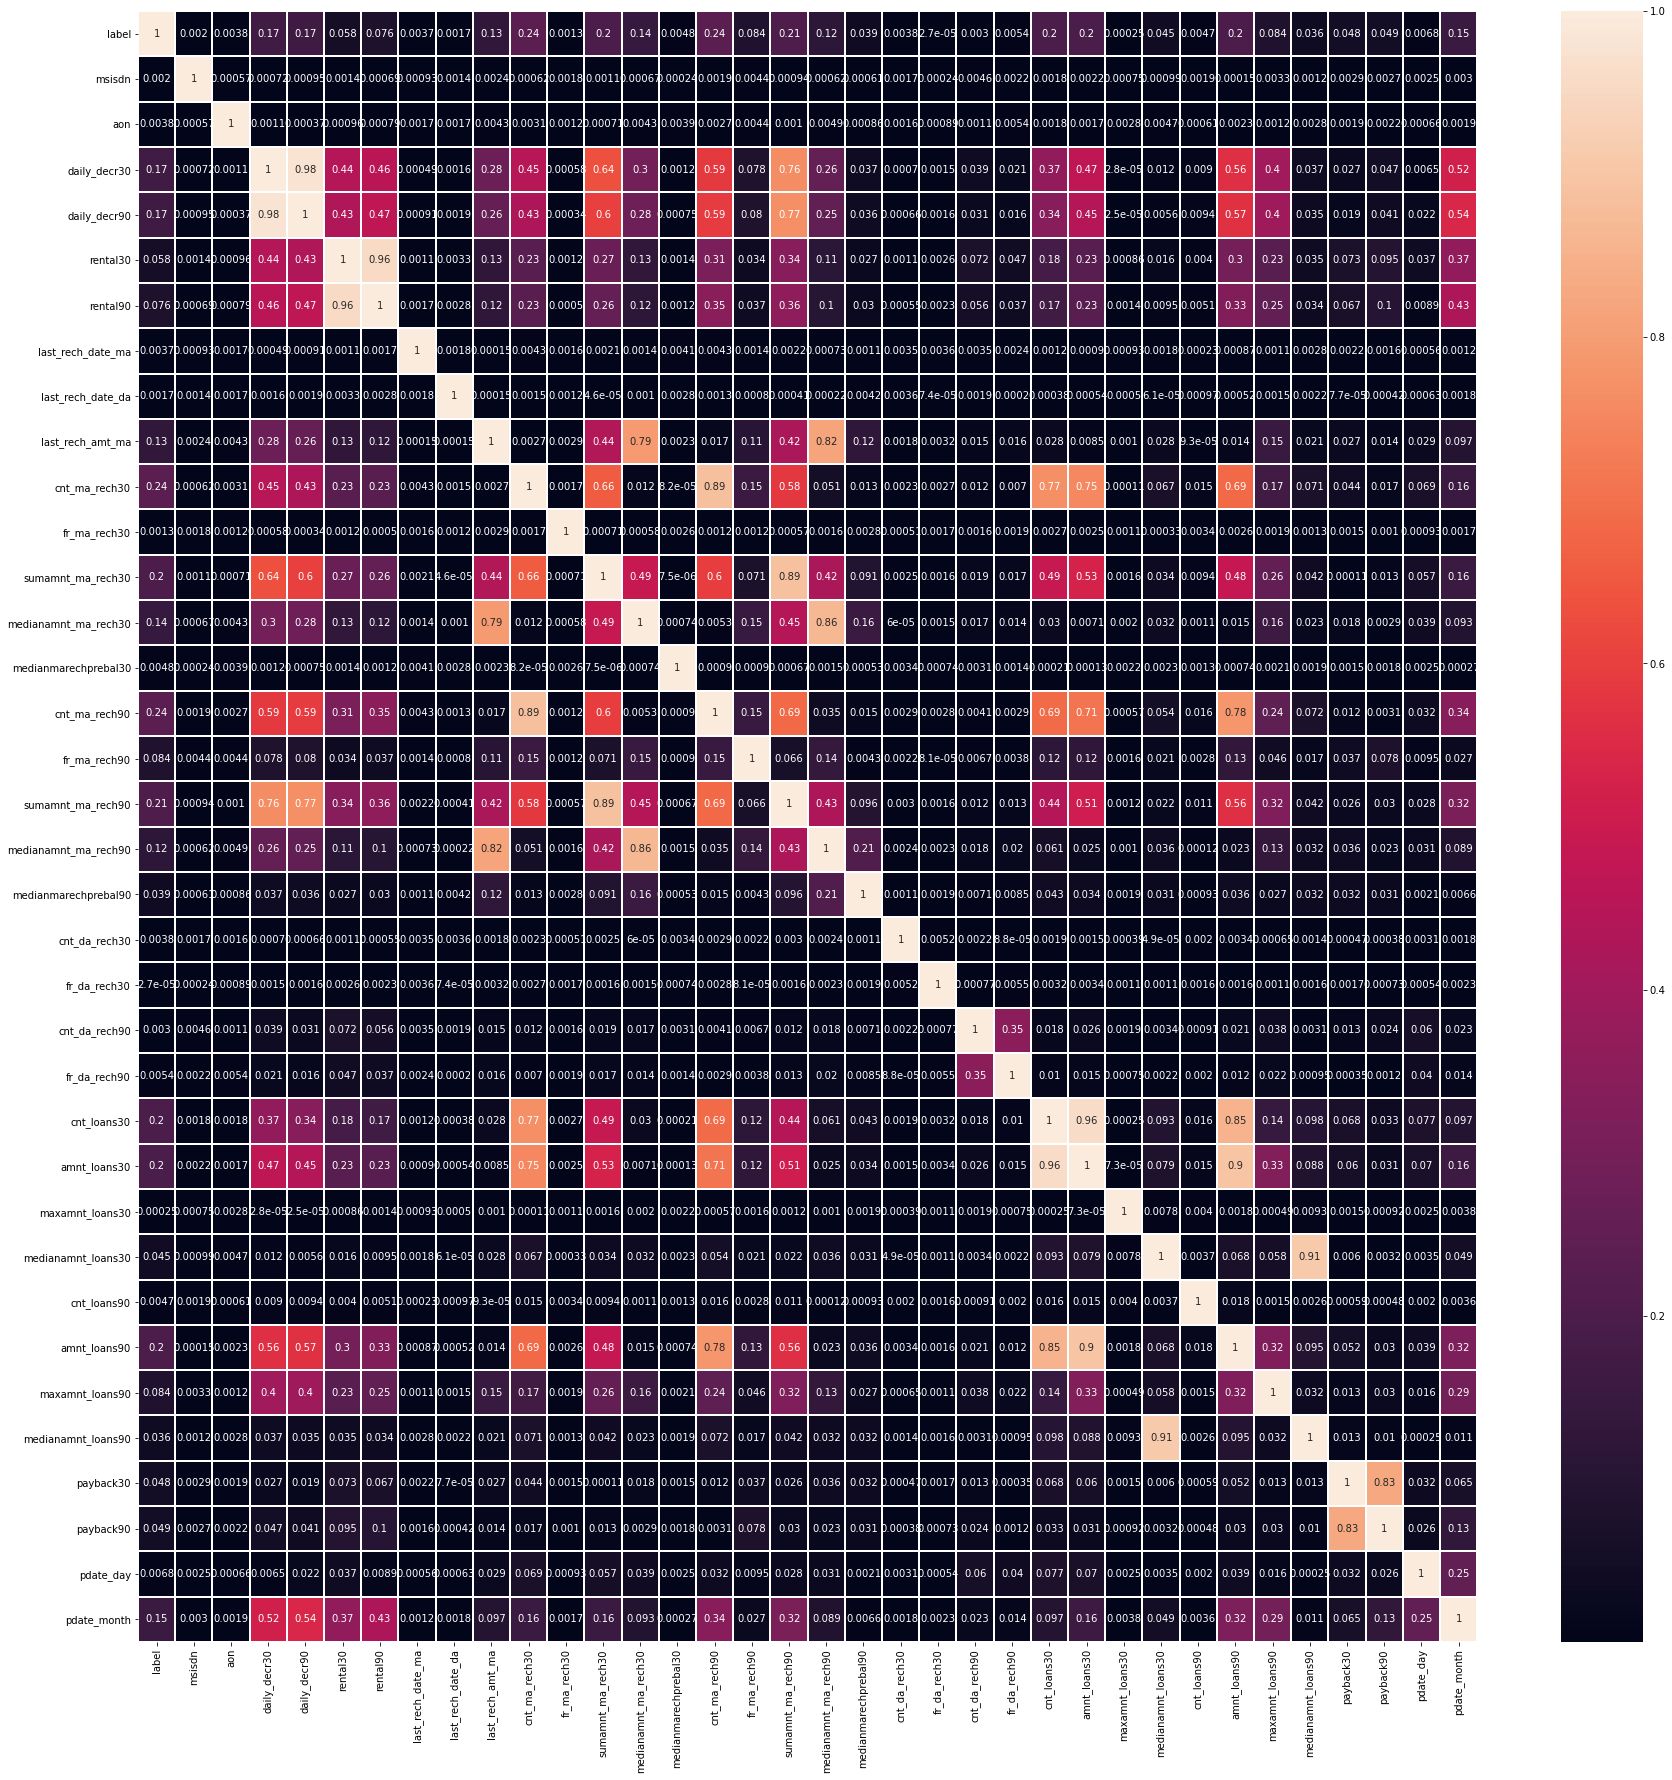

In [31]:
plt.figure(figsize=[30,30])
sns.heatmap(corr,annot=True,linecolor='white',linewidths=1)
plt.show()

In [32]:
corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
pdate_month             0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
pdate_day               0.006825
fr_da_rech90            0.005418
medianmarechprebal30    0.004829
cnt_loans90             0.004733
cnt_da_rech30           0.003827
aon                     0.003785
last_rech_date_ma       0.003728
cnt_da_rec

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [34]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [35]:
z[21][16]

4.4703916213001245

In [36]:
z[209587][31]

4.753189062627214

In [37]:
df_new=df.iloc[:,1:]

In [38]:
df_new.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [39]:
from sklearn.preprocessing import power_transform
transform_data=power_transform(df_new)
df_new=pd.DataFrame(transform_data,columns=df_new.columns)

In [40]:
df_new.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,-0.928552,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,0.710817,0.397522
1,0.904027,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,...,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,-0.410151,1.480133
2,-1.079623,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,...,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,0.609967,1.480133
3,0.290212,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,-0.968724,-1.133997
4,-1.832104,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,...,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,0.907066,-1.133997


In [41]:
df_new.skew()

msisdn                   -0.291511
aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90        

In [42]:
y=pd.DataFrame(df['label'])
y.head()

,label
0,0
1,1
2,1
3,1
4,1


In [43]:
dF=y.join(df_new)

In [44]:
dF.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,-0.928552,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,0.710817,0.397522
1,1,0.904027,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,...,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,-0.410151,1.480133
2,1,-1.079623,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,...,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,0.609967,1.480133
3,1,0.290212,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,-0.968724,-1.133997
4,1,-1.832104,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,...,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,0.907066,-1.133997


In [45]:
z=np.abs(zscore(dF))

In [46]:
threshold=3
print(np.where(z>3))

(array([     7,     24,     24, ..., 209587, 209587, 209591], dtype=int64), array([22,  5,  6, ..., 27, 31, 22], dtype=int64))


In [47]:
dF=dF[(z<3).all(axis=1)]

In [48]:
print(df.shape,dF.shape)

(209593, 36) (169959, 36)


In [49]:
df=dF

### Splitting independent and dependent variables (x and y)

In [50]:
x=df.drop("label",axis=1)
y=df["label"]

In [51]:
print(x.shape,y.shape)

(169959, 35) (169959,)


In [52]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best accuracy is ", maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8834627755550326 on Random_state  162


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=162)

In [58]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

In [59]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Acuuracy score of ",m,"is ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Acuuracy score of  LogisticRegression() is 
0.8834627755550326
[[ 1592  5028]
 [  914 43454]]
              precision    recall  f1-score   support

           0       0.64      0.24      0.35      6620
           1       0.90      0.98      0.94     44368

    accuracy                           0.88     50988
   macro avg       0.77      0.61      0.64     50988
weighted avg       0.86      0.88      0.86     50988



Acuuracy score of  DecisionTreeClassifier() is 
0.8827959519887032
[[ 3847  2773]
 [ 3203 41165]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      6620
           1       0.94      0.93      0.93     44368

    accuracy                           0.88     50988
   macro avg       0.74      0.75      0.75     50988
weighted avg       0.89      0.88      0.88     50988



Acuuracy score of  RandomForestClassifier() is 
0.9213540440888052
[[ 3559  3061]
 [  949 43419]]
              precision    recall  f1-score   suppor

In [60]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),x,y,cv=5).mean())

0.8799945942178609


In [61]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.9180390536974267


In [62]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.8787236981223258


Minimum difference in accuracy and cross_val_score is for Random Forest Classifier and f1_score is also good, so this our best model

### Hyper parameter  tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameters={'criterion':['gini','entropy'],'n_estimators':[200,500]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [200, 500]})

In [69]:
GCV.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [70]:
Final_mod=RandomForestClassifier(criterion='entropy',n_estimators=200)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)
print(classification_report(y_test,pred))

92.2609241390131
              precision    recall  f1-score   support

           0       0.80      0.54      0.65      6620
           1       0.94      0.98      0.96     44368

    accuracy                           0.92     50988
   macro avg       0.87      0.76      0.80     50988
weighted avg       0.92      0.92      0.92     50988



# Saving the Model

In [71]:
import joblib
joblib.dump(Final_mod,"microfinacnceproject.obj")

['microfinacnceproject.obj']

In [72]:
#loading the model
model=joblib.load("microfinacnceproject.obj")
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [73]:
y_test

34315     1
159368    1
205945    1
145768    1
36725     1
         ..
106060    1
104836    1
120096    1
21756     1
179108    1
Name: label, Length: 50988, dtype: int64